In [27]:
library(ggplot2) # to make pretty plots
library(dplyr) # for inner_join and left_join
library(car) # to recode
library(maps) # for the maps
library(gridExtra) # to arrange the plots in grids
library(plotly) # for interactive plots
library(cowplot)

In [29]:
# We have some global happy survey data from "World Happiness Report", however, can we just look at this one dimension?
#No, so let's add homicide rate and Suicide Rate to see a balanced pic. 

In [9]:
happy_2015 <- read.csv("2015.csv")
happy_2016 <- read.csv("2016.csv")
happy_2017 <- read.csv("2017.csv")

In [10]:
str(happy_2015)
str(happy_2016)
str(happy_2017)

'data.frame':	158 obs. of  12 variables:
 $ Country                      : Factor w/ 158 levels "Afghanistan",..: 136 59 38 106 25 46 100 135 101 7 ...
 $ Region                       : Factor w/ 10 levels "Australia and New Zealand",..: 10 10 10 10 6 10 10 10 1 1 ...
 $ Happiness.Rank               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Happiness.Score              : num  7.59 7.56 7.53 7.52 7.43 ...
 $ Standard.Error               : num  0.0341 0.0488 0.0333 0.0388 0.0355 ...
 $ Economy..GDP.per.Capita.     : num  1.4 1.3 1.33 1.46 1.33 ...
 $ Family                       : num  1.35 1.4 1.36 1.33 1.32 ...
 $ Health..Life.Expectancy.     : num  0.941 0.948 0.875 0.885 0.906 ...
 $ Freedom                      : num  0.666 0.629 0.649 0.67 0.633 ...
 $ Trust..Government.Corruption.: num  0.42 0.141 0.484 0.365 0.33 ...
 $ Generosity                   : num  0.297 0.436 0.341 0.347 0.458 ...
 $ Dystopia.Residual            : num  2.52 2.7 2.49 2.47 2.45 ...
'data.frame':	157 obs. of  13 va

In [11]:
colnames(happy_2015) <- c("Country","Region","Rank_2015","Score_2015","Err_2015","GDP_2015","Family_2015","Health_2015","Freedom_2015","Gov_2015","Generosity_2015","Dist_res_2015")
colnames(happy_2016) <- c("Country","Region_2016","Rank_2016","Score_2016","LCI_2016","UCI_2016","GDP_2016","Family_2016","Health_2016","Freedom_2016","Gov_2016","Generosity_2016","Dist_res_2016")
colnames(happy_2017) <- c("Country","Rank_2017","Score_2017","Whisker.high_2016","Whisker.low_2017","GDP_2017","Family_2017","Health_2017","Freedom_2017","Generosity_2017","Gov_2017","Dist_res_2017")

In [12]:
happy <- merge(happy_2015, happy_2016, by.x = "Country", by.y = "Country")
happy <- merge(happy, happy_2017, by.x = "Country", by.y = "Country")

In [13]:
happy$Region_2016 <- NULL

In [14]:
str(happy) 

'data.frame':	146 obs. of  34 variables:
 $ Country          : Factor w/ 158 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Region           : Factor w/ 10 levels "Australia and New Zealand",..: 8 2 5 9 4 2 1 10 2 5 ...
 $ Rank_2015        : int  153 95 68 137 30 127 10 13 80 49 ...
 $ Score_2015       : num  3.58 4.96 5.61 4.03 6.57 ...
 $ Err_2015         : num  0.0308 0.0501 0.051 0.0476 0.0461 ...
 $ GDP_2015         : num  0.32 0.879 0.939 0.758 1.054 ...
 $ Family_2015      : num  0.303 0.804 1.078 0.86 1.248 ...
 $ Health_2015      : num  0.303 0.813 0.618 0.167 0.787 ...
 $ Freedom_2015     : num  0.234 0.357 0.286 0.104 0.45 ...
 $ Gov_2015         : num  0.0972 0.0641 0.1738 0.0712 0.0848 ...
 $ Generosity_2015  : num  0.3651 0.1427 0.0782 0.1234 0.1145 ...
 $ Dist_res_2015    : num  1.95 1.9 2.43 1.95 2.84 ...
 $ Rank_2016        : int  154 109 38 141 26 121 9 12 81 42 ...
 $ Score_2016       : num  3.36 4.66 6.36 3.87 6.65 ...
 $ LCI_2016         : num  3.29 4.55 6.23

In [16]:
happy$Country <- recode(happy$Country, 
                           "'Congo (Brazzaville)' = 'Democratic Republic of the Congo';
                            'Congo (Kinshasa)'='Republic of Congo';
                            'United States'='USA';
                             'United Kingdom'= 'UK'
                           ")
happy$Country

[1] Afghanistan                      Albania                         
  [3] Algeria                          Angola                          
  [5] Argentina                        Armenia                         
  [7] Australia                        Austria                         
  [9] Azerbaijan                       Bahrain                         
 [11] Bangladesh                       Belarus                         
 [13] Belgium                          Benin                           
 [15] Bhutan                           Bolivia                         
 [17] Bosnia and Herzegovina           Botswana                        
 [19] Brazil                           Bulgaria                        
 [21] Burkina Faso                     Burundi                         
 [23] Cambodia                         Cameroon                        
 [25] Canada                           Chad                            
 [27] Chile                            China                           
 [29] Colombia                         Democratic Republic of the Congo
 [31] Republic of Congo                Costa Rica                      
 [33] Croatia                          Cyprus                          
 [35] Czech Republic                   Denmark                         
 [37] Dominican Republic               Ecuador                         
 [39] Egypt                            El Salvador                     
 [41] Estonia                          Ethiopia                        
 [43] Finland                          France                          
 [45] Gabon                            Georgia                         
 [47] Germany                          Ghana                           
 [49] Greece                           Guatemala                       
 [51] Guinea                           Haiti                           
 [53] Honduras                         Hungary                         
 [55] Iceland                          India                           
 [57] Indonesia                        Iran                            
 [59] Iraq                             Ireland                         
 [61] Israel                           Italy                           
 [63] Ivory Coast                      Jamaica                         
 [65] Japan                            Jordan                          
 [67] Kazakhstan                       Kenya                           
 [69] Kosovo                           Kuwait                          
 [71] Kyrgyzstan                       Latvia                          
 [73] Lebanon                          Liberia                         
 [75] Libya                            Lithuania                       
 [77] Luxembourg                       Macedonia                       
 [79] Madagascar                       Malawi                          
 [81] Malaysia                         Mali                            
 [83] Malta                            Mauritania                      
 [85] Mauritius                        Mexico                          
 [87] Moldova                          Mongolia                        
 [89] Montenegro                       Morocco                         
 [91] Myanmar                          Nepal                           
 [93] Netherlands                      New Zealand                     
 [95] Nicaragua                        Niger                           
 [97] Nigeria                          North Cyprus                    
 [99] Norway                           Pakistan                        
[101] Palestinian Territories          Panama                          
[103] Paraguay                         Peru                            
[105] Philippines                      Poland                          
[107] Portugal                         Qatar                           
[109] Romania                          Russia                          
[111] Rwanda                           Sau

In [ ]:
#Let's see the map.

Warning message:
“Column `Country` joining character vector and factor, coercing into character vector”

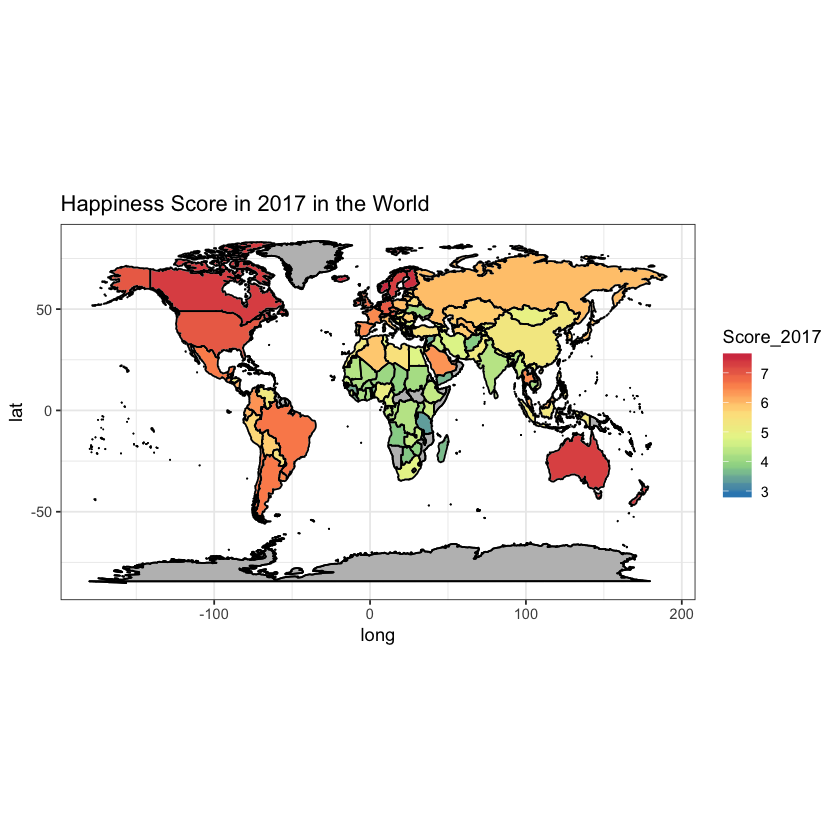

In [17]:
w <- map_data("world")
colnames(w)[5]<- "Country"
myw <- inner_join(w, happy, by = "Country")
worldplot <- ggplot(data = w, mapping = aes(x = long, y = lat, group = group)) + 
    coord_fixed(1.3) + 
    geom_polygon(color = "black", fill = "gray") +
    geom_polygon(data=myw, aes(x = long, y = lat, group = group, fill = Score_2017),color = "white") +
    geom_polygon(color = "black", fill = NA) +
    theme_bw() +
    ggtitle("Happiness Score in 2017 in the World") +
    scale_fill_distiller(palette = "Spectral")
worldplot

In [18]:
#Compute the variation in percentage between 2017 and 2015.

happy$var_2016_2015 = 100*(happy$Score_2016 - happy$Score_2015)/happy$Score_2015
happy$var_2017_2016 = 100*(happy$Score_2017 - happy$Score_2016)/happy$Score_2016
happy$var_2017_2015 = 100*(happy$Score_2017 - happy$Score_2015)/happy$Score_2015

In [ ]:
#Are “Happy” People Really Happy?
#In this section, we look into the correlation between the happiness score and behavioral indicators that are generally associated to happiness. 

In [19]:
kaggle <- read.csv("Kaggle.csv")
str(kaggle)
colnames(kaggle)[1] <- "Country"
merged <- merge(happy, kaggle, by.x = "Country", by.y = "Country")
str(merged)

'data.frame':	188 obs. of  66 variables:
 $ Id                                                                                  : Factor w/ 188 levels "Afghanistan",..: 125 9 165 46 120 64 81 180 31 121 ...
 $ Human.Development.Index.HDI.2014                                                    : num  0.944 0.935 0.93 0.923 0.922 ...
 $ Gini.coefficient.2005.2013                                                          : num  26.8 34 32.4 26.9 28.9 ...
 $ Adolescent.birth.rate.15.19.per.100k.20102015                                       : num  7.83 12.06 1.9 5.1 6.17 ...
 $ Birth.registration.funder.age.5.2005.2013                                           : num  100 100 100 100 100 100 100 100 100 100 ...
 $ Carbon.dioxide.emissionsAverage.annual.growth                                       : num  0.779 1.09 -1.101 -1.768 -0.253 ...
 $ Carbon.dioxide.emissions.per.capita.2011.Tones                                      : num  9.19 16.52 4.63 7.25 10.06 ...
 $ Change.forest.percentable.1

'data.frame':	139 obs. of  102 variables:
 $ Country                                                                             : Factor w/ 146 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Region                                                                              : Factor w/ 10 levels "Australia and New Zealand",..: 8 2 5 9 4 2 1 10 2 5 ...
 $ Rank_2015                                                                           : int  153 95 68 137 30 127 10 13 80 49 ...
 $ Score_2015                                                                          : num  3.58 4.96 5.61 4.03 6.57 ...
 $ Err_2015                                                                            : num  0.0308 0.0501 0.051 0.0476 0.0461 ...
 $ GDP_2015                                                                            : num  0.32 0.879 0.939 0.758 1.054 ...
 $ Family_2015                                                                         : num  0.303 0.804 1.078 0.86 1.248 ...

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


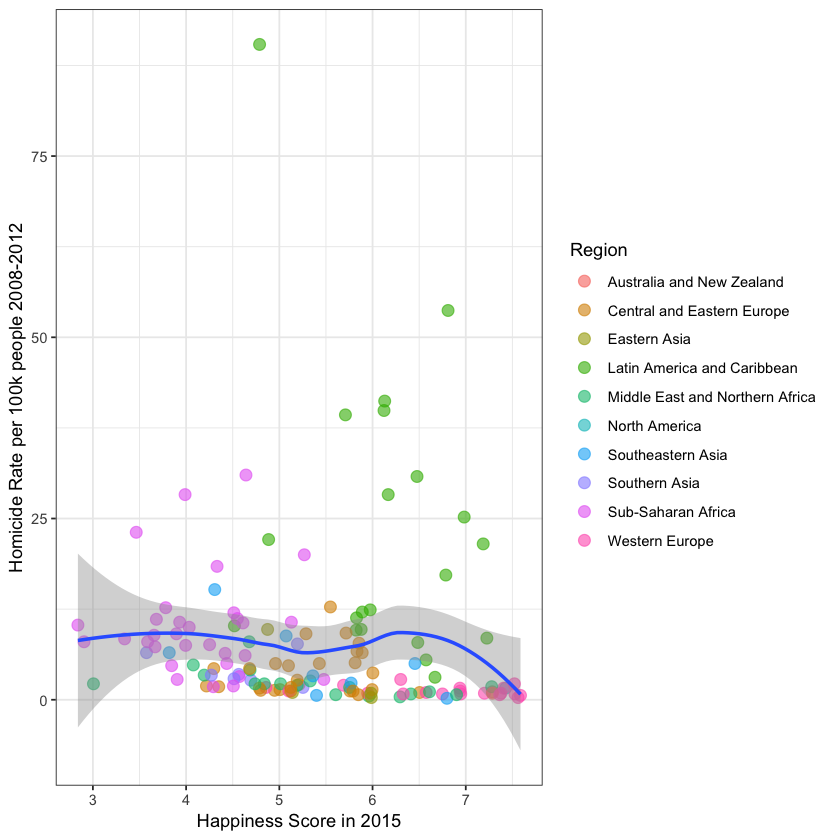

In [20]:
ggplot(data=merged, aes(y=Homicide.rate.per.100k.people.2008.2012, x=Score_2015))+
  theme_bw() +
  geom_point(aes(color=Region), size=3, alpha=0.6)   +
  geom_smooth() +
  ylab("Homicide Rate per 100k people 2008-2012")+
  xlab("Happiness Score in 2015")

In [ ]:
#The homicide rate is pretty flat as a function of the happiness score, and seems to have more a dependence on the geographical region.

In [22]:
#Suicide Rate
#When we look at the suicide rate, this is not flat as a function of the happiness score, and the trends are different for the male suicide rate and the female one.

In [24]:
srf <- ggplot(data=merged, aes(y=Female.Suicide.Rate.100k.people, x=Score_2015))+
  theme_bw() +
  geom_point(aes(color=Region), size=3, alpha=0.6) + geom_smooth()+
  ylab("Female Suicide Rate per 100k people")+
  xlab("Happiness Score in 2015")

srm <- ggplot(data=merged, aes(y=MaleSuicide.Rate.100k.people, x=Score_2015))+
  theme_bw() +
  geom_point(aes(color=Region), size=3, alpha=0.6) +
  geom_smooth() +
  ylab("Male Suicide Rate per 100k people")+
  xlab("Happiness Score in 2015")
  


`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


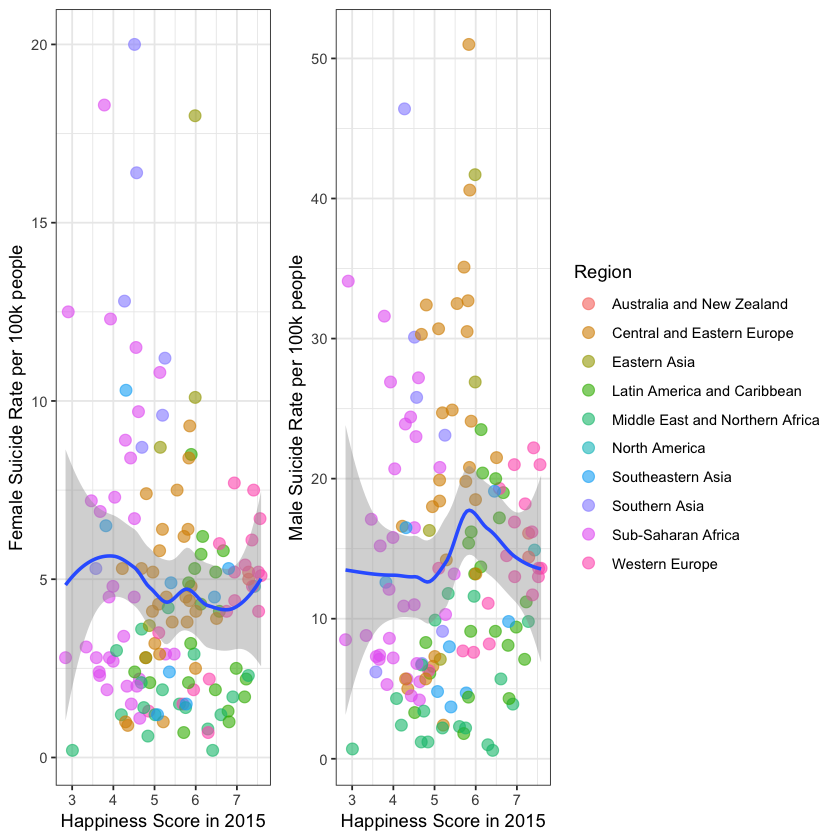

In [28]:
grid.arrange(srf+theme(legend.position = "none"), srm+theme(legend.position = "none"), get_legend(srm), ncol = 3)